# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

From a data perspective, this involves building a predictive model. The target variable is the car's price. Independent variables will include features such as the car's make, model, year, odometer, condition, size, fuel type, and other relevant attributes. Using exploratory data analysis (EDA) and predictive modeling techniques, we will determine which factors have the most significant impact on used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [171]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



In [172]:
original_data = pd.read_csv('/content/vehicles.csv')

In [173]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [174]:
original_data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
263041,7311604371,santa fe / taos,15858,2015.0,acura,tlx,NaN,4 cylinders,gas,102122.0,clean,automatic,19UUB1F51FA010464,fwd,NaN,sedan,silver,nm
298792,7311432058,dayton / springfield,17998,2016.0,ford,mustang,excellent,NaN,gas,100543.0,clean,automatic,1FA6P8TH2G5288497,rwd,NaN,coupe,grey,oh
261411,7311305462,albuquerque,31990,2017.0,ford,mustang gt coupe 2d,good,8 cylinders,gas,19043.0,clean,automatic,1FA6P8CF5H5237592,rwd,NaN,coupe,silver,nm
336779,7312353139,pittsburgh,33990,2013.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,other,34413.0,clean,other,3GTP2WE76DG226983,4wd,NaN,pickup,red,pa
350881,7315797653,sioux falls / SE SD,18950,2012.0,porsche,cayenne s awd v8 suv,NaN,NaN,gas,129466.0,clean,automatic,WP1AB2A27CLA42032,NaN,NaN,NaN,NaN,sd
183782,7303754660,baltimore,14988,2016.0,mazda,mazda6,NaN,4 cylinders,gas,75781.0,clean,automatic,JM1GJ1W5XG1401063,fwd,NaN,sedan,black,md
284598,7313414839,new hampshire,99,2015.0,toyota,venza,NaN,NaN,gas,56599.0,clean,automatic,4T3BA3BB9FU075273,4wd,full-size,NaN,grey,nh
159430,7306151144,dubuque,19900,2013.0,ford,f-150,fair,NaN,gas,82000.0,rebuilt,automatic,1FTFW1ET2DFA27835,NaN,full-size,truck,white,ia
337728,7308204942,pittsburgh,12900,2013.0,mercedes-benz,benz e350,NaN,NaN,gas,83000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,pa
127510,7316955782,hawaii,3500,2005.0,nissan,350z touring,fair,6 cylinders,gas,194008.0,clean,automatic,NaN,NaN,compact,coupe,black,hi


In [175]:
original_data['price'].describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [176]:
original_data.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [177]:
missing_percentage = original_data.isna().sum() * 100 / len(original_data)
missing_percentage

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


*Note: We can see that column 'size' has 71% missing values, we will not choose it as one of the features. For the rest of columns, we will drop the missing values as a solution. An alternative way is to create an 'Unknow' category but this would make the final model less explanable.*

In [178]:
# clean the data
data = original_data[['price','year','manufacturer','condition','cylinders','fuel','odometer','title_status','transmission','drive','type']]
data = data[data['price'] > 0]
data_cleaned = data.dropna()
data_cleaned.shape

(123538, 11)

**EDA**

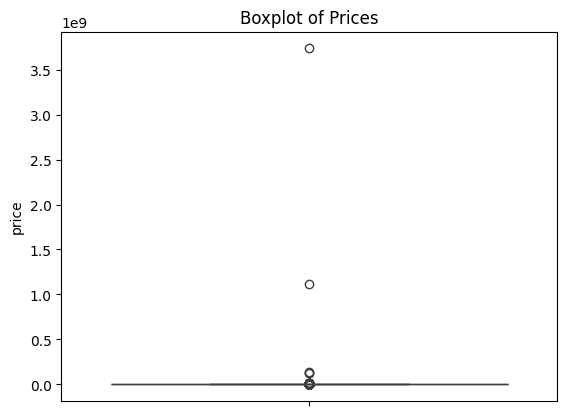

In [179]:
#boxplot of price
sns.boxplot(data_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()

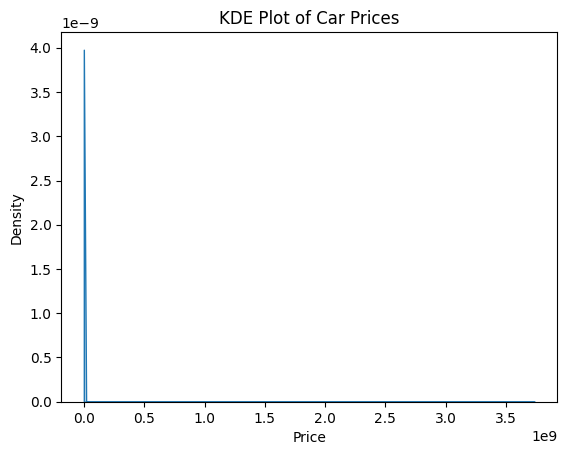

In [180]:
# Create the KDE plot
sns.kdeplot(data_cleaned['price'], fill=True)
plt.title('KDE Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [181]:
#calculate the log of price
data_cleaned['log_price'] = np.log(data_cleaned['price'])

<ipython-input-181-e98273508325>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['log_price'] = np.log(data_cleaned['price'])


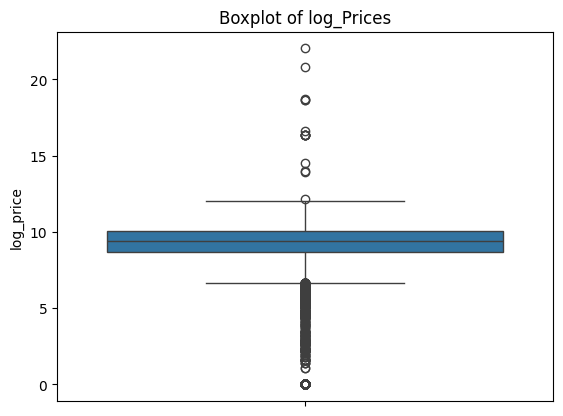

In [182]:
#boxplot of log price
sns.boxplot(data_cleaned['log_price'])
plt.title('Boxplot of log_Prices')
plt.show()

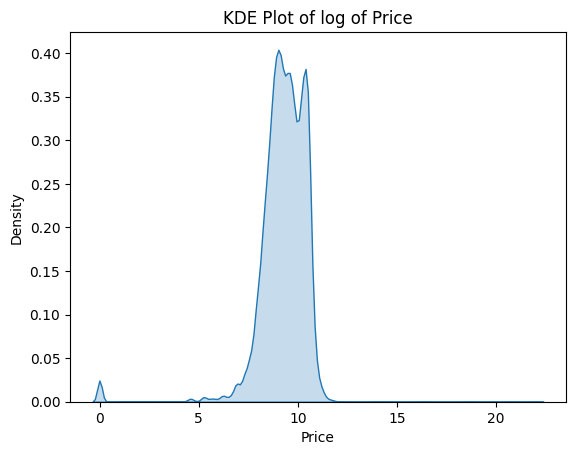

In [183]:
# Create the KDE plot of the log of price
sns.kdeplot(data_cleaned['log_price'], fill=True)
plt.title('KDE Plot of log of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

*Note: Because price is not normally distributed, so use the log of price as the target*

####Removing Outliers

In [184]:
#Remove price outliers using IQR
Q1 = data_cleaned['price'].quantile(0.25)
Q3 = data_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['is_outlier'] = (data_cleaned['price'] < lower_bound) | (data_cleaned['price'] > upper_bound)

# remove the outlier
data_without_outlier = data_cleaned[~data_cleaned['is_outlier']]

<ipython-input-184-770868d2472c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_outlier'] = (data_cleaned['price'] < lower_bound) | (data_cleaned['price'] > upper_bound)


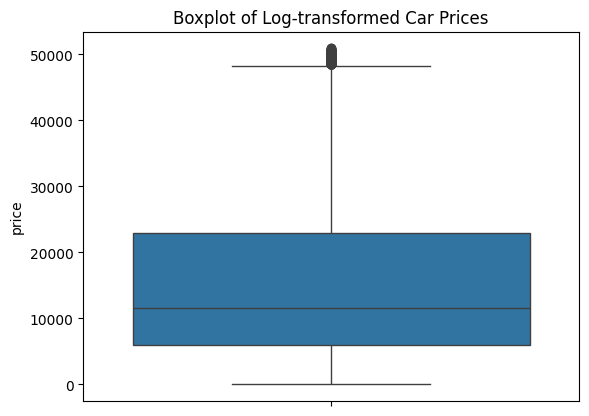

In [185]:
sns.boxplot(data_without_outlier['price'])
plt.title('Boxplot of Log-transformed Car Prices')
plt.show()


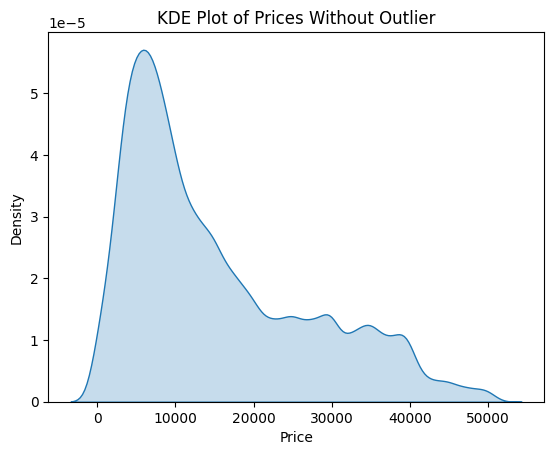

In [186]:
# Create the KDE plot after rempving outliers
sns.kdeplot(data_without_outlier['price'], fill=True)
plt.title('KDE Plot of Prices Without Outlier')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

*Note: we can see even removing outliers, the price is very skewed. So better to make models with log of price as the target.*

In [187]:
#Remove log of price outliers using IQR
Q1 = data_cleaned['log_price'].quantile(0.25)
Q3 = data_cleaned['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['is_outlier'] = (data_cleaned['log_price'] < lower_bound) | (data_cleaned['log_price'] > upper_bound)

# remove the outlier
data_without_outlier = data_cleaned[~data_cleaned['is_outlier']]

<ipython-input-187-715445161d9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['is_outlier'] = (data_cleaned['log_price'] < lower_bound) | (data_cleaned['log_price'] > upper_bound)


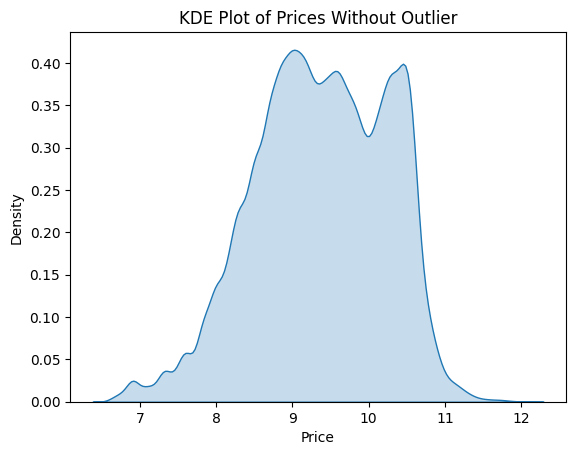

In [188]:
# Create the KDE plot after rempving outliers
sns.kdeplot(data_without_outlier['log_price'], fill=True)
plt.title('KDE Plot of Prices Without Outlier')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

####Identify Correlations

In [189]:
# Selecting columns and Define column groups
categorical_cols = ['transmission', 'drive', 'type','fuel']
ordinal_cols = ['condition', 'cylinders', 'title_status']
numerical_cols = ['odometer','year']
other_cols = ['manufacturer'] # this is a column with high cardinality

In [190]:
# Identify the correlations of numerical columns
corr = data_without_outlier[numerical_cols].corrwith(data_without_outlier['log_price'])
corr

,0
odometer,-0.230367
year,0.381233


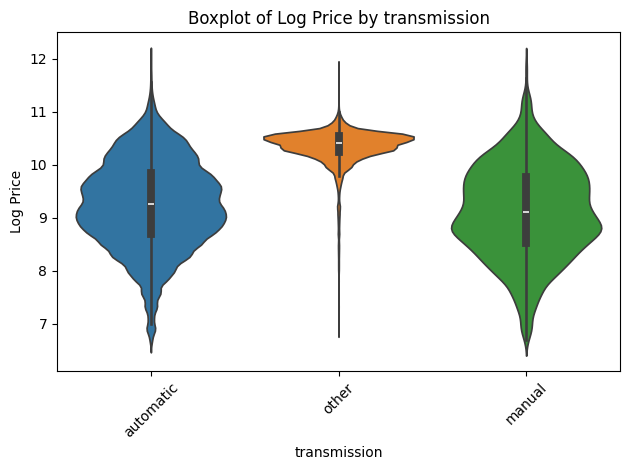

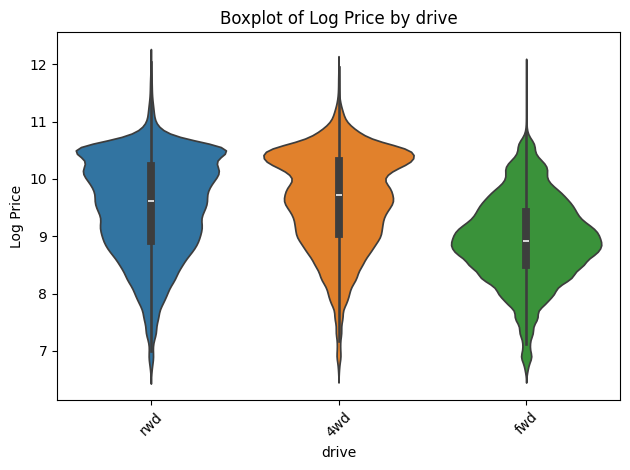

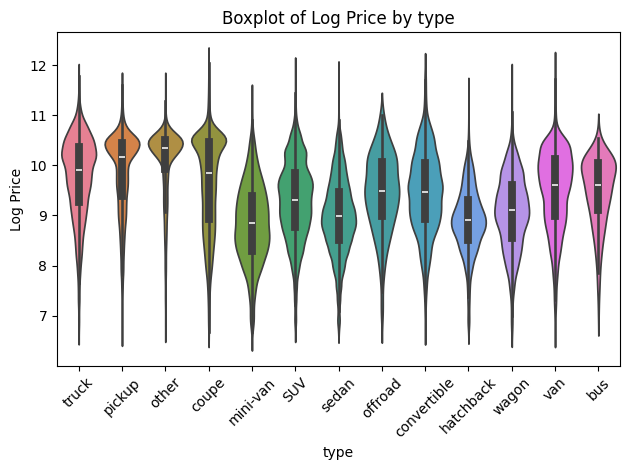

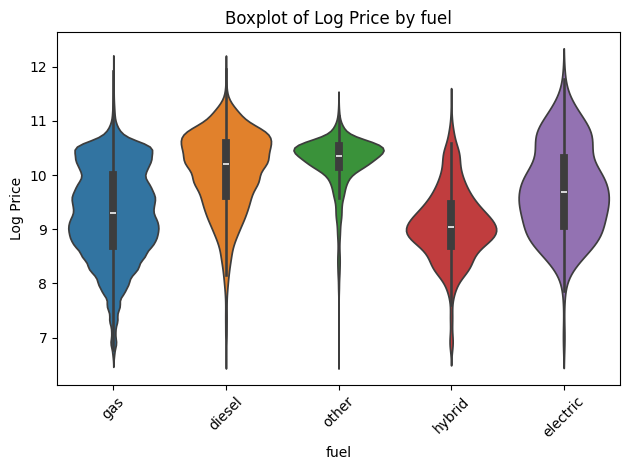

In [191]:
#Identify the correlations of categorical columns
for col in categorical_cols:
    sns.violinplot(x=col, y='log_price', data=data_without_outlier,hue = col)
    plt.title(f'Boxplot of Log Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Log Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [192]:
# Print unique values for categorical columns
for col in categorical_cols:
  print(f"{col}: {data_without_outlier[col].unique()}")

# Print unique values for ordinal columns
for col in ordinal_cols:
  print(f"{col}: {data_without_outlier[col].unique()}")


transmission: ['automatic' 'other' 'manual']
drive: ['rwd' '4wd' 'fwd']
type: ['truck' 'pickup' 'other' 'coupe' 'mini-van' 'SUV' 'sedan' 'offroad'
 'convertible' 'hatchback' 'wagon' 'van' 'bus']
fuel: ['gas' 'diesel' 'other' 'hybrid' 'electric']
condition: ['excellent' 'good' 'new' 'fair' 'like new' 'salvage']
cylinders: ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
title_status: ['clean' 'rebuilt' 'salvage' 'missing' 'lien' 'parts only']


####Prepocessing the columns

In [193]:
# Map ordinal data
ordinal_mappings = {
    'condition': {'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5, 'new': 6},
    'cylinders': {'other':0, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6,
                  '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12},
    'title_status': { 'missing': 1, 'parts only': 2, 'salvage': 3, 'lien': 4, 'rebuilt': 5, 'clean': 6},
}
for col, mapping in ordinal_mappings.items():
    data_without_outlier[col] = data_without_outlier[col].map(mapping)


# Handle the 'manufacturer' column (frequency encoding)
data_without_outlier['manufacturer_freq'] = data_without_outlier['manufacturer'].map(data_without_outlier['manufacturer'].value_counts())

# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data_without_outlier, columns=categorical_cols, drop_first=True)

# Updated column groups
encoded_categorical_cols = [col for col in data_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]
ordinal_cols = ['condition', 'cylinders', 'title_status']
numerical_cols = ['odometer', 'year']


# define X and y
X = pd.concat([data_encoded[encoded_categorical_cols],data_without_outlier[ordinal_cols],data_without_outlier[numerical_cols],data_without_outlier['manufacturer_freq']],axis = 1)
y = data_without_outlier['log_price']



<ipython-input-193-65b5ee371120>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outlier[col] = data_without_outlier[col].map(mapping)
<ipython-input-193-65b5ee371120>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outlier[col] = data_without_outlier[col].map(mapping)
<ipython-input-193-65b5ee371120>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [194]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical and ordinal features
scaler = StandardScaler()
X_train[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']] = scaler.fit_transform(X_train[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']])
X_test[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']] = scaler.transform(X_test[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']])


In [195]:
X_train.shape

(97141, 26)

####Select Features using Lasso Model

In [196]:
# choose the best alpha using GridSearchCV
alpha_values = [0.01, 0.1, 1, 10]

lasso = Lasso()
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Negative MSE for regression
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Alpha: 0.01


In [197]:
# Extract selected features
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['transmission_manual', 'transmission_other', 'drive_fwd', 'drive_rwd',
       'type_coupe', 'type_pickup', 'type_sedan', 'type_truck', 'fuel_gas',
       'condition', 'cylinders', 'title_status', 'odometer', 'year',
       'manufacturer_freq'],
      dtype='object')


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

####Building a Regression Model

In [198]:
# Build a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

linear_y_pred = linear_model.predict(X_test_selected)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

Linear Regression Mean Squared Error: 0.36919505792195945


In [199]:
linear_coefficients = linear_model.coef_
linear_feature_names = X_train_selected.columns.tolist()

linear_coef_df = pd.DataFrame({
    'Feature': linear_feature_names,
    'Coefficient': linear_coefficients
})

linear_coef_df['Absolute Coefficient'] = linear_coef_df['Coefficient'].abs()
linear_coef_df = linear_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
linear_coef_df


,Feature,Coefficient,Absolute Coefficient
1,transmission_other,0.868704,0.868704
8,fuel_gas,-0.389114,0.389114
2,drive_fwd,-0.342612,0.342612
13,year,0.274098,0.274098
7,type_truck,0.262862,0.262862
9,condition,0.217826,0.217826
0,transmission_manual,0.179943,0.179943
4,type_coupe,0.174504,0.174504
5,type_pickup,0.145591,0.145591
10,cylinders,0.134349,0.134349


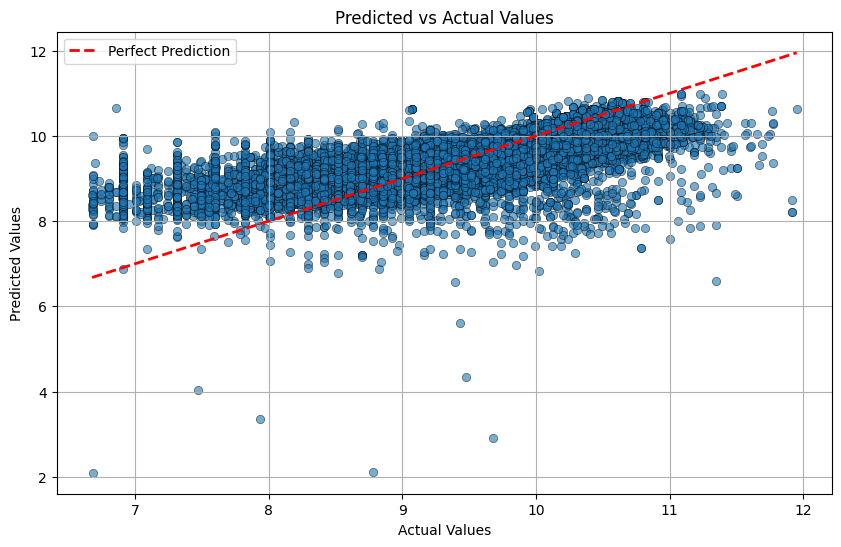

In [214]:
# visualize the prediction and the actual for the linear regression model
df = pd.DataFrame({'y_test': y_test, 'linear_y_pred': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='y_test', y='linear_y_pred', data=df, alpha=0.6, edgecolor='k')

plt.plot([df['y_test'].min(), df['y_test'].max()],
         [df['y_test'].min(), df['y_test'].max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()



####Build a Lasso Model

In [200]:
# Build a Lasso model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Lasso_model = Lasso(alpha=best_alpha)
Lasso_model.fit(X_train_selected, y_train)

# Evaluate lasso model
Lasso_y_pred = Lasso_model.predict(X_test_selected)
Lasso_mse = mean_squared_error(y_test, Lasso_y_pred)
print(f"Lasso Regression with Best Alpha Mean Squared Error: {Lasso_mse}")

Lasso Regression with Best Alpha Mean Squared Error: 0.3764084059148557


In [201]:
lasso_coefficients = Lasso_model.coef_
lasso_feature_names = X_test_selected.columns.tolist()

lasso_coef_df = pd.DataFrame({
    'Feature': lasso_feature_names,
    'Coefficient': lasso_coefficients
})

lasso_coef_df['Absolute Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
lasso_coef_df

,Feature,Coefficient,Absolute Coefficient
1,transmission_other,0.778079,0.778079
2,drive_fwd,-0.348073,0.348073
8,fuel_gas,-0.297585,0.297585
13,year,0.259650,0.259650
9,condition,0.195024,0.195024
10,cylinders,0.154116,0.154116
6,type_sedan,-0.126522,0.126522
7,type_truck,0.125034,0.125034
12,odometer,-0.102934,0.102934
0,transmission_manual,0.024571,0.024571


####Build a Ridge Model (degree=1)

In [202]:
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Set up Ridge Regression with GridSearchCV
alpha_values = [0.1, 1, 10,100]
ridge = Ridge()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_poly, y_train)

# Extract the best model and its alpha value
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge Regression: {best_alpha}")

# Evaluate the Best Ridge Model
ridge_y_pred = best_ridge_model.predict(X_test_poly)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression (degree={degree}) with Best Alpha Mean Squared Error: {ridge_mse}")

# Get the coefficients of the Ridge Model
feature_names = poly.get_feature_names_out(X_train_selected.columns)
ridge_coefficients = best_ridge_model.coef_
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})
ridge_coef_df['Absolute Coefficient'] = ridge_coef_df['Coefficient'].abs()  # Add absolute value for sorting
ridge_coef_df = ridge_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
ridge_coef_df

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Alpha for Ridge Regression: 0.1
Ridge Regression (degree=1) with Best Alpha Mean Squared Error: 0.369195029783153


,Feature,Coefficient,Absolute Coefficient
1,transmission_other,0.868692,0.868692
8,fuel_gas,-0.389110,0.389110
2,drive_fwd,-0.342610,0.342610
13,year,0.274099,0.274099
7,type_truck,0.262858,0.262858
9,condition,0.217824,0.217824
0,transmission_manual,0.179940,0.179940
4,type_coupe,0.174502,0.174502
5,type_pickup,0.145591,0.145591
10,cylinders,0.134350,0.134350


####Build a Ridge Model (degree=2)

In [203]:
# Generate Polynomial Features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

In [204]:
# Set up Ridge Regression with GridSearchCV
alpha_values = [0.1, 1, 10, 100]
ridge = Ridge()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_poly, y_train)

# Extract the best model and its alpha value
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge Regression: {best_alpha}")

# Evaluate the Best Ridge Model
ridge_y_pred = best_ridge_model.predict(X_test_poly)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression (degree={degree}) with Best Alpha Mean Squared Error: {ridge_mse}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Alpha for Ridge Regression: 10
Ridge Regression (degree=2) with Best Alpha Mean Squared Error: 0.20243912052918814


In [205]:
# Get the coefficients of the Ridge Model
feature_names = poly.get_feature_names_out(X_train_selected.columns)
ridge_coefficients = best_ridge_model.coef_
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})
ridge_coef_df['Absolute Coefficient'] = ridge_coef_df['Coefficient'].abs()  # Add absolute value for sorting
ridge_coef_df = ridge_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
ridge_coef_df

,Feature,Coefficient,Absolute Coefficient
13,year,0.671403,0.671403
22,transmission_manual type_truck,-0.380237,0.380237
12,odometer,-0.351557,0.351557
20,transmission_manual type_pickup,-0.351473,0.351473
0,transmission_manual,0.311008,0.311008
...,...,...,...
81,type_pickup type_sedan,0.000000,0.000000
82,type_pickup type_truck,0.000000,0.000000
16,transmission_manual transmission_other,0.000000,0.000000
91,type_sedan type_truck,0.000000,0.000000


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Model Evaluation**
1. Linear Regression Model: 0.36
2. Lasso Model MSE: 0.36
3. Ridge Model with (degree =2): 0.2; Ridge Model with (degree =1): 0.37


In comparison, the Ridge Model with degree=2 has the smallest error. However a higher degree won't make the model very explainable. Some of the combinations just don't make much sense in terms of business context.

For the Linear Regression model, top positive features include: `transmission_other`, `year`, `type_truck`, `condition`, `transmission_manual`, `type_coupe`, `type_pickup`, `cylinders`. Top negative features includ: `fuel_gas`,`drive_fwd`, `type_sedan`, `odometer`.

For the Lasso Model, top positive features include:`transmission_other`,`year`,
 `condition`,`cylinders`,`type_truck`. Top negative features includ: `drive_fwd`, `fuel_gas`,`type_sedan`,`odometer`

We can see they have very similar feature rankings.

**To be revisited later**
- Missing values imputation: I just dropped the missing values for now. Considering the percentage of missing values are quite high around 20%-30%, there probably should be a better way to deal with those data.

- From the visualization of Actual and Prediction for the linear regression model, it seems that there are still a few outliers that deviate the model significantly. Remove the outliers further.

- Explore other ways to select features like sequential selection. See if they can generate better models. For now the featares are quite a lot.

- More data collection on other type of transmisson and fuel. The `transmission_other` and `fuel_other` coefficient, however this value is quite obscure.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Business Insights**
- Car type, Transmission, Year, Condition,cylinders are the top drivers of the price.
- The type of car is important in deciding the car price. Some types are naturally at a very high price, like truck, coupe, pickup. Others like sedan has relatively low price.
- Front-wheel drive vehichles are less valued compared to other types
- Non-standard transmissions can add values like dual-clutch. Its coeficient is very high.
- Gas car may have lower prices compared to other types.
- Title status, number of cylinders, Manufacturer doesn't have much influencing power.

**Recommendations：**
- Collect more high-price types, like truck, coupe, pickup. Offer promotions to those less welcome like sedan
- Adjust the price of the car in the inventory, increase those that are welcome and decrease those that are less welcome so that they can be sold quickly, like the Front-wheel drive vehichles.
